In [ ]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cross-validation scores: [0.76471936 0.65857197 0.66368843 0.69965636 0.66648847]
Mean cross-validation score: 0.6906249177314701


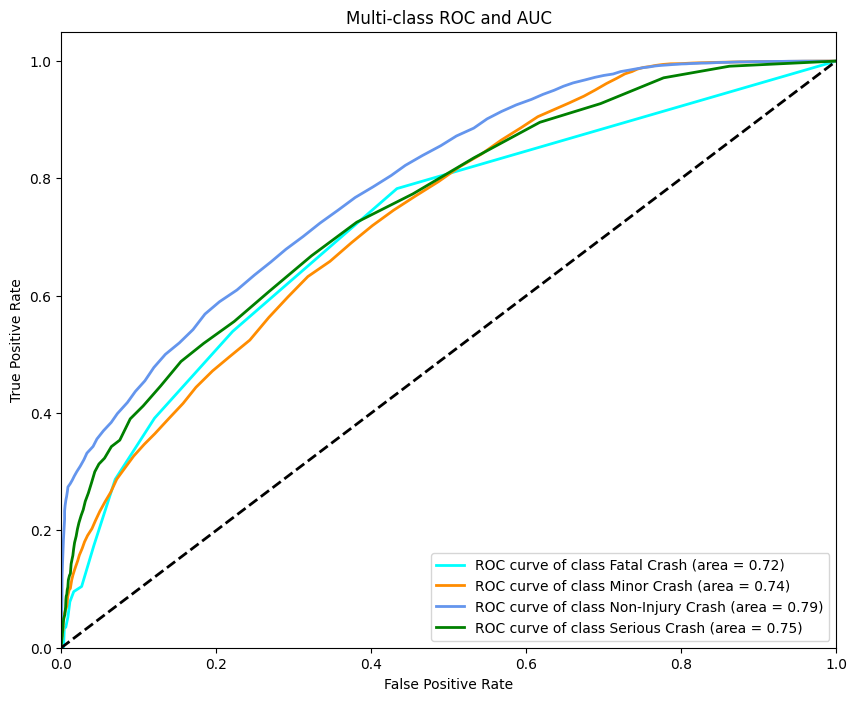

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7058
Precision: 0.6673
Recall: 0.7058
F1-score: 0.6520


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
                   precision    recall  f1-score   support

     Fatal Crash       0.00      0.00      0.00       115
     Minor Crash       0.60      0.30      0.40      3629
Non-Injury Crash       0.73      0.96      0.83      8441
   Serious Crash       0.47      0.07      0.12       910

        accuracy                           0.71     13095
       macro avg       0.45      0.33      0.34     13095
    weighted avg       0.67      0.71      0.65     13095



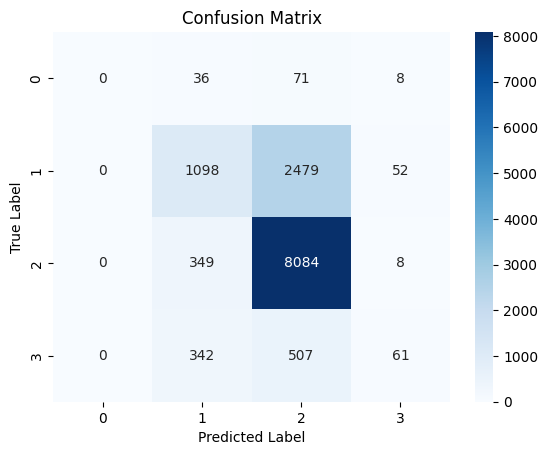

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import interp
from itertools import cycle
from sklearn.model_selection import cross_val_score


from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Read the CSV file directly into a DataFrame
data = pd.read_csv(csv_file_path, encoding='utf-8')

# Selecting relevant features for the model
features = ['Simple / complex crash', 'Number of vehicles involved', 'Crash year',
            'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
            'Regional council', 'Road category', 'Deprivation mesh block deprivation index',
            'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
            'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
            'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
            'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
            'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

# Ensure only the relevant columns are used
data = data[features].dropna()

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(data.drop('Crash severity', axis=1))
y = data['Crash severity']

# Binarize the labels for ROC curve
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_bin = lb.transform(y_train)
y_test_bin = lb.transform(y_test)

# Initialize the Random Forest Classifier with default parameters
rf_clf = RandomForestClassifier(random_state=42)

# Apply cross-validation and evaluate the model
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


# Train the model on the training set
rf_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_clf.predict(X_test)

# Predict probabilities for ROC curve calculation
y_pred_proba = rf_clf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC and AUC')
plt.legend(loc="lower right")
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics with four decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


# Print the classification report for a detailed overview
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Display the Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

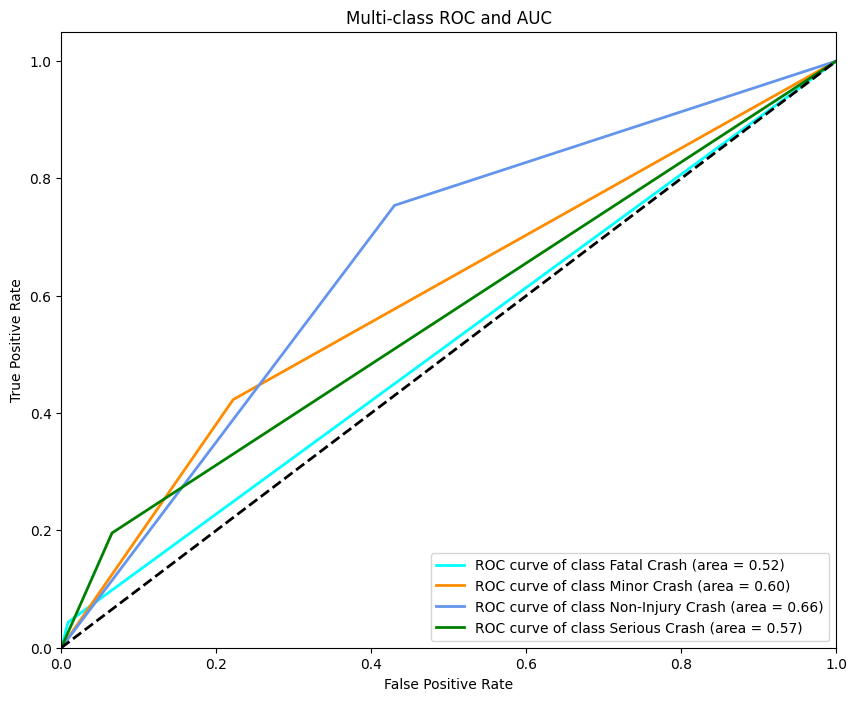

Accuracy: 0.6172
Precision: 0.6205
Recall: 0.6172
F1-score: 0.6188

Classification Report:
                   precision    recall  f1-score   support

     Fatal Crash       0.04      0.04      0.04       115
     Minor Crash       0.42      0.42      0.42      3629
Non-Injury Crash       0.76      0.75      0.76      8441
   Serious Crash       0.18      0.20      0.19       910

        accuracy                           0.62     13095
       macro avg       0.35      0.35      0.35     13095
    weighted avg       0.62      0.62      0.62     13095



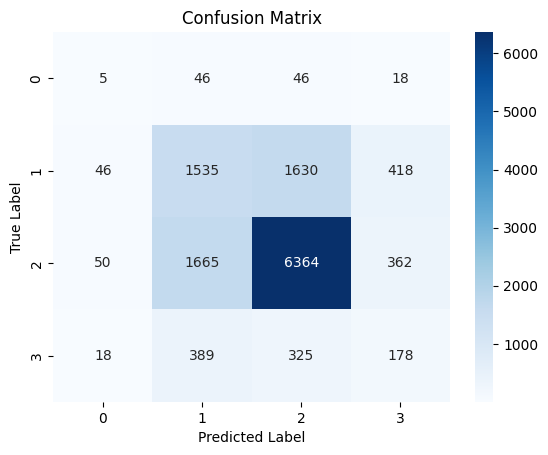

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Changed to DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

# from google.colab import drive
# drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Read the CSV file directly into a DataFrame
data = pd.read_csv(csv_file_path, encoding='utf-8')

# Selecting relevant features for the model
features = ['Simple / complex crash', 'Number of vehicles involved', 'Crash year',
            'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
            'Regional council', 'Road category', 'Deprivation mesh block deprivation index',
            'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
            'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
            'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
            'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
            'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

# Ensure only the relevant columns are used
data = data[features].dropna()

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(data.drop('Crash severity', axis=1))
y = data['Crash severity']

# Binarize the labels for ROC curve
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_bin = lb.transform(y_train)
y_test_bin = lb.transform(y_test)

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)  # Changed to DecisionTreeClassifier

# Train the model on the training set
dt_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_clf.predict(X_test)

# Predict probabilities for ROC curve calculation
y_pred_proba = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC and AUC')
plt.legend(loc="lower right")
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics with four decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the classification report for a detailed overview
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cross-validation scores: [0.74799542 0.56174112 0.55998473 0.61603666 0.58965939]
Average cross-validation score: 0.6150834617699272


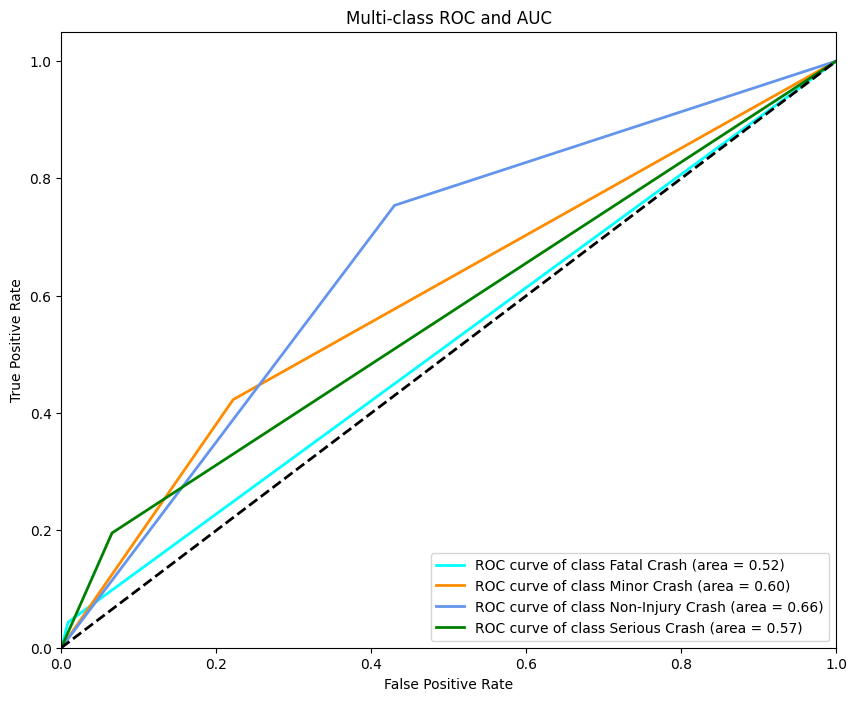

Accuracy: 0.6172
Precision: 0.6205
Recall: 0.6172
F1-score: 0.6188

Classification Report:
                   precision    recall  f1-score   support

     Fatal Crash       0.04      0.04      0.04       115
     Minor Crash       0.42      0.42      0.42      3629
Non-Injury Crash       0.76      0.75      0.76      8441
   Serious Crash       0.18      0.20      0.19       910

        accuracy                           0.62     13095
       macro avg       0.35      0.35      0.35     13095
    weighted avg       0.62      0.62      0.62     13095



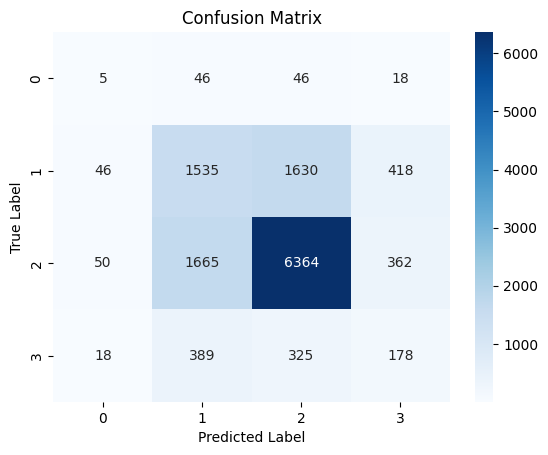

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

from google.colab import drive
drive.mount('/content/drive')

# Define the CSV file path in Google Drive
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Read the CSV file directly into a DataFrame
data = pd.read_csv(csv_file_path, encoding='utf-8')

# Selecting relevant features for the model
features = ['Simple / complex crash', 'Number of vehicles involved', 'Crash year',
            'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
            'Regional council', 'Road category', 'Deprivation mesh block deprivation index',
            'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
            'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
            'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
            'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
            'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

data = data[features].dropna()

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(data.drop('Crash severity', axis=1))
y = data['Crash severity']

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Apply cross-validation
cv_scores = cross_val_score(dt_clf, X, y, cv=5)  # Using 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# If you still want to train and test the model on a specific train-test split
# for further evaluation (like ROC curves or confusion matrices), you can continue as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training set
dt_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_clf.predict(X_test)

# Predict probabilities for ROC curve calculation
y_pred_proba = dt_clf.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC and AUC')
plt.legend(loc="lower right")
plt.show()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics with four decimal places
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print the classification report for a detailed overview
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display the Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Cross-validation scores: [0.70207547 0.60396226 0.61150943 0.69188679 0.62596716]
Mean cross-validation score: 0.6470802251759855
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Accuracy: 0.6668
Precision: 0.6416
Recall: 0.6668
F1-score: 0.6077

Classification Report:
                   precision    recall  f1-score   support

     Fatal Crash       0.50      0.01      0.03        77
     Minor Crash       0.64      0.29      0.40      1703
Non-Injury Crash       0.68      0.96      0.79      3121
   Serious Crash       0.41      0.08      0.14       399

      

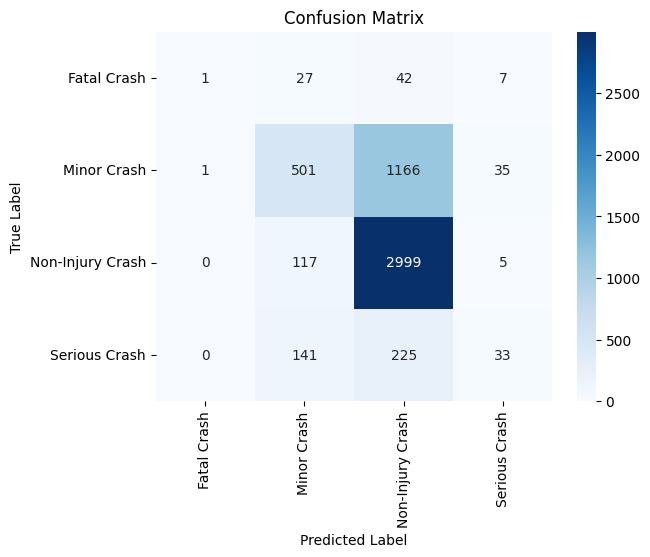

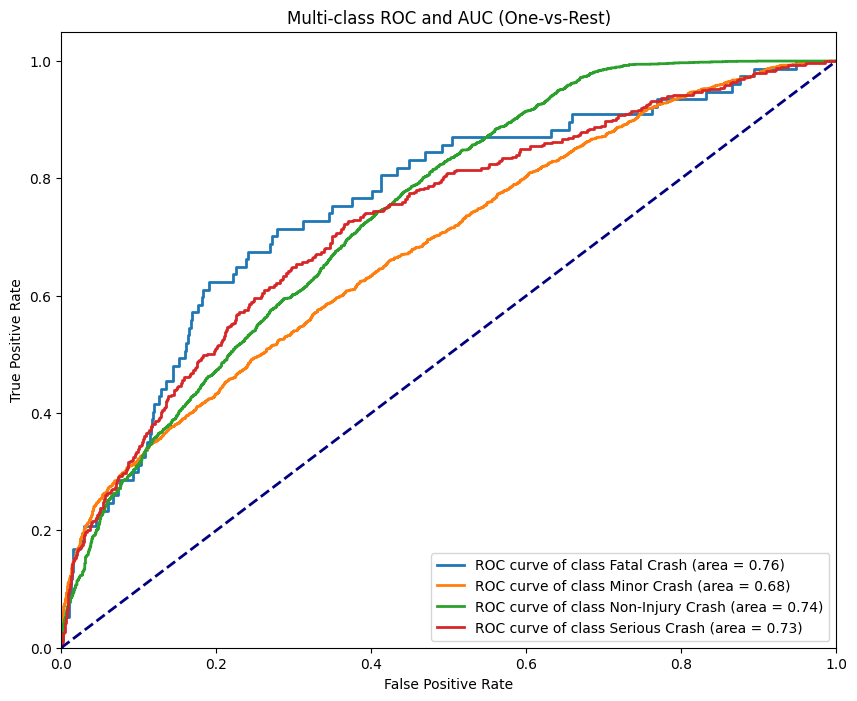

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# Define the CSV file path
csv_file_path = '/content/drive/My Drive/Cleaned_data.csv'

# Read the CSV file directly into a DataFrame
try:
    data = pd.read_csv(csv_file_path)

    # Drop rows with NaN values
    data = data.dropna()

    # Selecting relevant features for the model
    features = ['Simple / complex crash', 'Number of vehicles involved', 'Crash year',
                'Day of the week', 'Month of year', 'Is weekend', 'TLA (Territorial local authority)',
                'Regional council', 'Road category', 'Deprivation mesh block deprivation index',
                'Intersection / midblock', 'Urban or open speed zone', 'Posted speed limit',
                'Junction type', 'Road curvature', 'Road feature', 'Gradient', 'Surface type',
                'Road type', 'Street lights', 'Number of lanes', 'Traffic control present',
                'Primary surface condition', 'Road markings', 'Natural Light', 'Primary weather',
                'Vehicle 1 type', 'Ethnicity', 'Gender', 'Road user type', 'Crash severity']

    data = data[features]

    # Label encode categorical variables except the target variable
    label_encoder = LabelEncoder()
    categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('Crash severity')
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])

    # Separating the target variable
    target_variable = 'Crash severity'
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply cross-validation (Ensure to import cross_val_score)
    cv_scores = cross_val_score(gbm, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())

    # Create the LightGBM classifier with default parameters
    gbm = lgb.LGBMClassifier(objective='multiclass', num_class=len(np.unique(y_train)), verbose=0, random_state=42)

    # Train the model
    gbm.fit(X_train, y_train)

    # Predict on the test data
    y_pred = gbm.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics with four decimal places
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    # Print the classification report for a detailed overview
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Display the Confusion Matrix with class labels
    confusion = confusion_matrix(y_test, y_pred, labels=np.unique(data['Crash severity']))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(data['Crash severity']), yticklabels=np.unique(data['Crash severity']))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Calculate ROC and AUC for each class using One-vs-Rest (OvR)
    n_classes = len(np.unique(data['Crash severity']))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    y_pred_proba = gbm.predict_proba(X_test)

    class_names = np.unique(data['Crash severity'])  # Class names

    plt.figure(figsize=(10, 8))
    lw = 2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=lw, label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC and AUC (One-vs-Rest)')
    plt.legend(loc="lower right")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
